# InfiniBand Traffic Monitor Results

## Python Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [3]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

experiment_dir = "ibmon/example"
experiment = "o186i221_1234_aggregate.csv"
dataframe = pd.read_csv(f"{experiment_dir}/{experiment}", header=0)

#dataframe
KB = 1000
MB = 1000 * KB
GB = 1000 * MB
dataframe["PortXmitData_sum"] / GB

0      0.000548
1      0.000008
2      0.000008
3      0.000008
4      0.000015
         ...   
137    0.000015
138    0.000008
139    0.000008
140    0.000011
141    0.000015
Name: PortXmitData_sum, Length: 142, dtype: float64

## Plotting

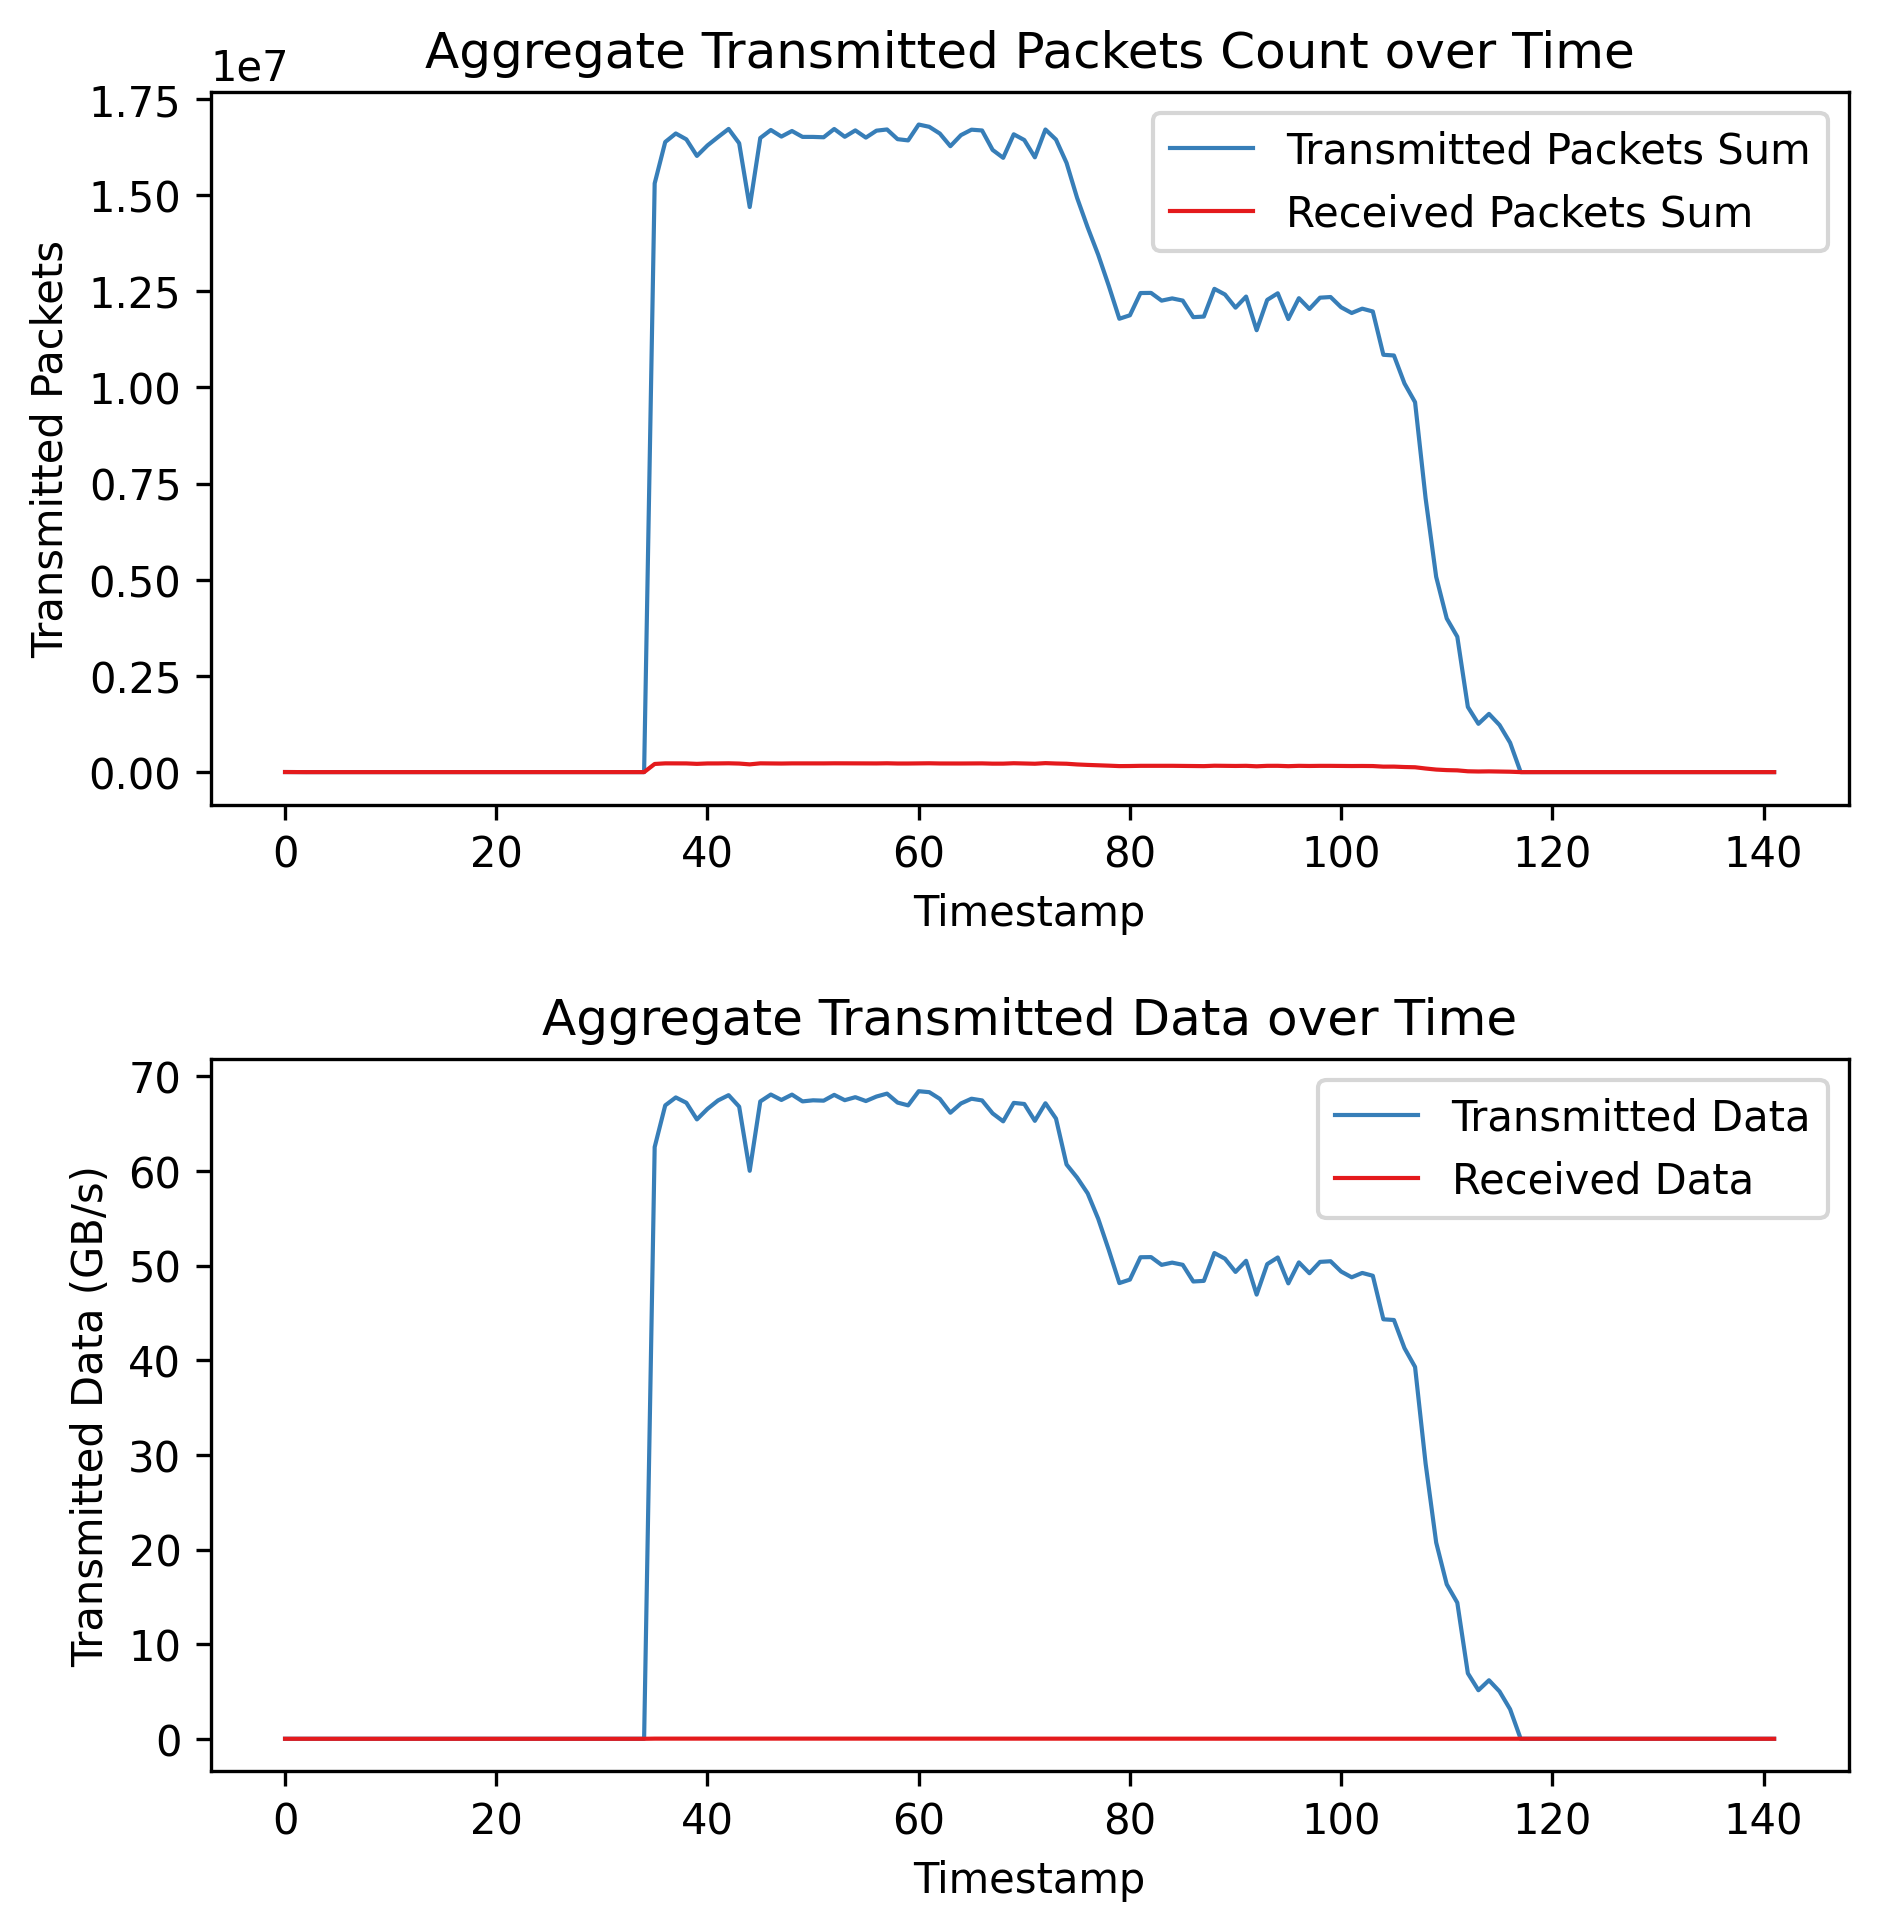

In [5]:
number_rows = 2
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(7,7), dpi=300)
fig.tight_layout(pad=4)

ax[0].plot(
    dataframe["timestamp"],
    dataframe["PortXmitPkts_sum"],
    lw=1, label="Transmitted Packets Sum",
    color=CB_color_cycle["blue"]
)

ax[0].plot(
    dataframe["timestamp"],
    dataframe["PortRcvPkts_sum"],
    lw=1, label="Received Packets Sum",
    color=CB_color_cycle["red"]
)

#ax[0].set_ylim(0, 2e7)
ax[0].set_title("Aggregate Transmitted Packets Count over Time")
ax[0].set_ylabel("Transmitted Packets")
ax[0].set_xlabel("Timestamp")
ax[0].legend()


ax[1].plot(
    dataframe["timestamp"],
    dataframe["PortXmitData_sum"],
    lw=1, label="Transmitted Data Sum",
    color=CB_color_cycle["blue"]
)

ax[1].plot(
    dataframe["timestamp"],
    dataframe["PortRcvData_sum"],
    lw=1, label="Received Data Sum",
    color=CB_color_cycle["red"]
)

ax[1].set_title("Aggregate Transmitted Data over Time")
ax[1].set_ylabel("Transmitted Data")
ax[1].set_xlabel("Timestamp")
ax[1].legend()

plt.show()